<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

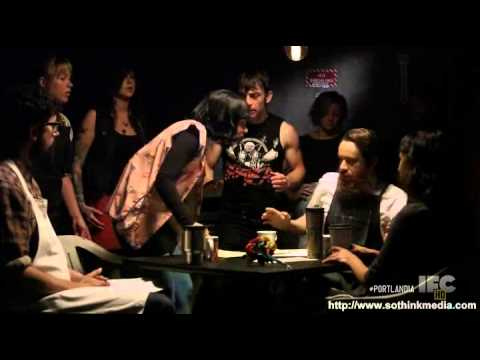

In [60]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [61]:
%pwd

'C:\\Users\\Chris\\Desktop\\Unit4_Sprint1\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [62]:
import pandas as pd
import squarify
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [63]:
# Start here 
def clean_data(df):
    """ Clean and return the dataframe """
    # remove date and any leading/trailing whitespace from the review text
    df['full_review_text'] = df['full_review_text'].apply(lambda x: x[x.index(' ', 1):].strip())
    # Make rating column ints
    df['star_rating'] = df['star_rating'].apply(lambda x: int(x[1]))
    
    return df

In [64]:
shops = clean_data(shops)

In [65]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4


In [66]:
shops.shape

(7616, 3)

In [67]:
shops['star_rating'].value_counts()

5    3780
4    2360
3     738
2     460
1     278
Name: star_rating, dtype: int64

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [68]:
import spacy
from spacy.tokenizer import Tokenizer
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [69]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['review_tokens'] = tokens

In [70]:
shops['review_tokens'].head()

0    [1, check-in, Love, love, loved, the, atmosphe...
1    [Listed, in, Date, Night:, Austin,, Ambiance, ...
2    [1, check-in, Listed, in, Brunch, Spots, I, lo...
3    [Very, cool, decor!, Good, drinks, Nice, seati...
4    [1, check-in, They, are, located, within, the,...
Name: review_tokens, dtype: object

In [71]:
from collections import Counter
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [72]:
wc = count(shops['review_tokens'])
wc.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
23,the,6520,27779,1.0,0.034993,0.034993,0.856092
44,and,6804,25748,2.0,0.032434,0.067427,0.893382
42,a,6181,22085,3.0,0.027820,0.095247,0.811581
3,I,5469,19780,4.0,0.024916,0.120163,0.718093
36,to,5631,16904,5.0,0.021294,0.141457,0.739364
6,,4343,14990,6.0,0.018883,0.160339,0.570247
34,of,5087,12495,7.0,0.015740,0.176079,0.667936
78,is,4955,11748,8.0,0.014799,0.190877,0.650604
63,was,3743,9539,9.0,0.012016,0.202893,0.491465
80,in,4429,8901,10.0,0.011212,0.214106,0.581539


In [73]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['review_tokens'] = tokens

In [74]:
wc = count(shops['review_tokens'])
wc.head(40)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
5,,4343,14990,1.0,0.036535,0.036535,0.570247
0,coffee,4210,8058,2.0,0.019640,0.056175,0.552784
109,place,3029,4264,3.0,0.010393,0.066568,0.397715
104,great,2438,3250,4.0,0.007921,0.074489,0.320116
249,it's,2061,3117,5.0,0.007597,0.082086,0.270614
188,like,2034,2902,6.0,0.007073,0.089159,0.267069
177,good,2084,2779,7.0,0.006773,0.095932,0.273634
40,1,1998,2035,8.0,0.004960,0.100892,0.262342
43,check-in,1957,1961,9.0,0.004780,0.105672,0.256959
32,love,1434,1806,10.0,0.004402,0.110074,0.188288


In [75]:
STOP_WORDS = nlp.Defaults.stop_words.union([' ', 'ordered','coffee.', 'coffee', "latte", 'shop', "i'm", "i've", "it's", '1', 
                                            '2', '3', '-', 'check-in', 'check-ins', 'got', 'austin', 'come'])

In [76]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['review_tokens'] = tokens

In [77]:
wc = count(shops['review_tokens'])
wc.head(15)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
100,place,3029,4264,1.0,0.011677,0.011677,0.397715
95,great,2438,3250,2.0,0.008900,0.020577,0.320116
177,like,2034,2902,3.0,0.007947,0.028524,0.267069
167,good,2084,2779,4.0,0.007610,0.036134,0.273634
26,love,1434,1806,5.0,0.004946,0.041079,0.188288
782,little,1230,1479,6.0,0.004050,0.045130,0.161502
335,don't,1133,1395,7.0,0.003820,0.048950,0.148766
161,nice,1188,1368,8.0,0.003746,0.052696,0.155987
463,food,1092,1363,9.0,0.003733,0.056429,0.143382
610,time,1099,1345,10.0,0.003683,0.060112,0.144301


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [80]:
good_reviews = shops[shops['star_rating'] >= 4]
wc_good = count(good_reviews['review_tokens'])

bad_reviews = shops[shops['star_rating'] <= 3]
wc_bad = count(bad_reviews['review_tokens'])

NameError: name 'wc_good' is not defined

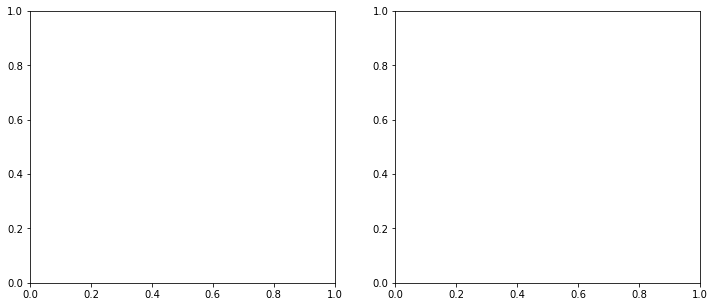

In [79]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12,5)

# words in good reviews
squarify.plot(sizes=wc_good['pct_total'][:20], label=wc_good['word'][:20], alpha=.8, ax=ax[0])
ax[0].axis('off')
ax[0].set_title('Common words in good reveiws', size='xx-large')

# words in bad reviews
squarify.plot(sizes=wc_bad['pct_total'][:20], label=wc_bad['word'][:20], alpha=.8, ax=ax[1])
ax[1].axis('off')
ax[1].set_title('Common words in bad reveiws', size='xx-large')

plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

